# WIth the usual solveur

In [1]:
import matplotlib.pyplot as plt
exec(open("solver.py").read(), globals())

In [2]:
a = 0.1
Param_phy= [a, 2.]      # 0.2, 10
      
#Init = [0.5, Param_phy[1]]
Init = [0.5, 0.]

Param_freq = {"p":  10.} #2
dt = 0.001
finalTime = 20
Param_strength = {"scale":0.005} # 0.0008
Param_coupled = {"alpha":20, # 20
                 "beta":2.0} # 500


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

In [3]:
Param_freq = {"p":  10.}
Fire_param["Param_freq"] = Param_freq
finalTime = 20

In [4]:
DT = np.array([0.0002, 0.0005, 0.001 , 0.002 , 0.005 , 0.01  , 0.015 , 0.02  , 0.03  , 0.04  , 0.05  , 0.07  , 0.1])

C = np.zeros(len(DT))
for i,dt in enumerate(DT):
    numberOfSimulation = 100 # 200
    S = Solver(numberOfSimulation=numberOfSimulation, model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
    S.run()
    c = S.collapse()
#    print("Probability of collapse (per time units): ", c)
    C[i] = c

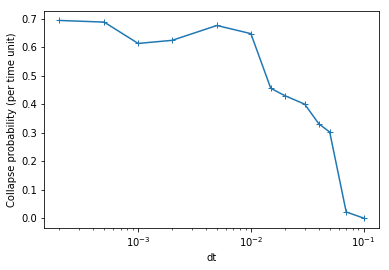

In [5]:
plt.semilogx(DT, C, "+-")
plt.ylabel("Collapse probability (per time unit)")
plt.xlabel("dt")
plt.show()

The problem is that if freq is to close to $\frac{1}{dt}$ then they are almost no dynamics between two fires

# Trying a new solver :

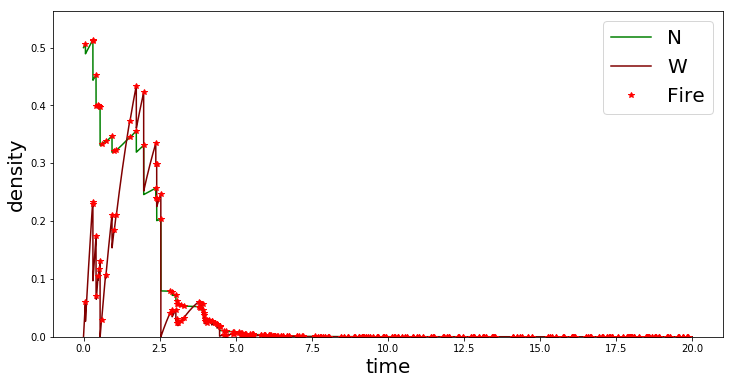

Variability :  0.008282112054071178
Variability 0 :  0.008282112054071178


In [6]:
exec(open("solver2.py").read(), globals())

In [7]:
Cnew = np.zeros(len(DT))
for i,dt in enumerate(DT):
    numberOfSimulation = 200
    S = Solver(numberOfSimulation=numberOfSimulation, model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
    S.run()
    c = S.collapse()
#    print("Probability of collapse (per time units): ", c)
    Cnew[i] = c

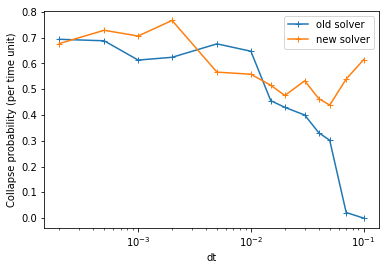

In [8]:
plt.semilogx(DT, C, "+-", label="old solver")
plt.semilogx(DT, Cnew, "+-", label="new solver")
plt.ylabel("Collapse probability (per time unit)")
plt.xlabel("dt")
plt.legend()
plt.show()